In [1]:
from Model.DistanceLayer import siamese_network
from Model.SiameseModel import SiameseModel
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import CosineSimilarity
from tensorflow.keras.callbacks import ModelCheckpoint
from DS_Generator import DS_Generator
from Model.DistanceLayer import DistanceLayer
import Visualizer

2022-03-20 16:59:05.859979: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-20 16:59:05.860081: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 16:59:05.860784: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
train_ds, val_ds = DS_Generator().preprocess(subset=True)


Triplet pairs generated! 

Dataset generated! 



In [3]:
checkpoint_path = "ckpts/weights/training_1.cp"
cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [4]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
siamese_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[cp_callback])

2022-03-20 11:15:24.048847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-20 11:15:24.066009: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2995200000 Hz


Epoch 1/10
3567/3567 [==============================] - 4619s 1s/step - loss: 0.5277 - val_loss: 0.4747

Epoch 00001: saving model to ckpts/training_1.cp
Epoch 2/10
3567/3567 [==============================] - 4571s 1s/step - loss: 0.4819 - val_loss: 0.4439

Epoch 00002: saving model to ckpts/training_1.cp
Epoch 3/10
3567/3567 [==============================] - 4516s 1s/step - loss: 0.4951 - val_loss: 0.4151

Epoch 00003: saving model to ckpts/training_1.cp
Epoch 4/10
3567/3567 [==============================] - 4665s 1s/step - loss: 0.4440 - val_loss: 0.4319

Epoch 00004: saving model to ckpts/training_1.cp
Epoch 5/10
  82/3567 [..............................] - ETA: 1:02:46 - loss: 0.4246

KeyboardInterrupt: 

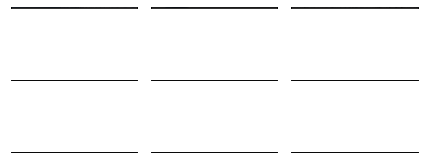

AttributeError: 'DistanceLayer' object has no attribute 'embed'

In [12]:
sample = next(iter(train_ds))
Visualizer.plot_preprocessed(*sample)

anchor, positive, negative = sample
anchor_embedding, positive_embedding, negative_embedding = DistanceLayer().embed(anchor, positive, negative)

In [ ]:
positive_similarity = CosineSimilarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = CosineSimilarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())